In [1]:
%matplotlib inline
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from matplotlib import pyplot
from collections import Counter
# pip install imbalanced-learn
import imblearn
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split

In [2]:
# Самостоятельно создаем датасет (10000 экз 2 класса 1% vs 99 %)
X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0,
                           n_clusters_per_class = 1, weights = [0.99],
                           random_state = 1)
counter = Counter(y)

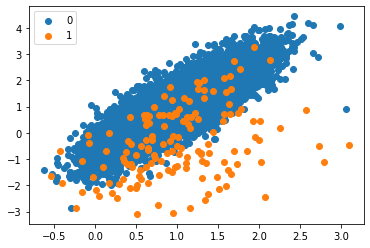

In [3]:
# Визуализация
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
pyplot.legend()
pyplot.show()

In [4]:
print(counter)

Counter({0: 9853, 1: 147})


In [5]:
print(imblearn.__version__)

0.9.1


In [6]:
# Метод 1 - Удаление экземпляров мажоритарного класса (Undersamplint)
undersampling_v1 = NearMiss(version = 1)

Counter({0: 147, 1: 147})


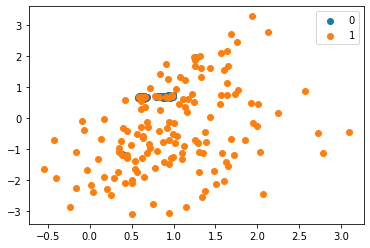

In [7]:
# Трансформируем датасет
X1, y1 = undersampling_v1.fit_resample(X, y)
counter = Counter(y1)
print(counter)
# Визуализация
for label, _ in counter.items():
    row_ix = np.where(y1 == label)[0]
    pyplot.scatter(X1[row_ix, 0], X1[row_ix, 1], label = str(label))
pyplot.legend()
pyplot.show()

Counter({0: 147, 1: 147})


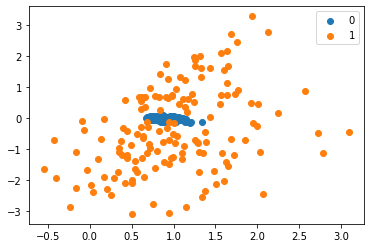

In [8]:
undersampling_v2 = NearMiss(version = 2)
# Трансформируем датасет
X2, y2 = undersampling_v2.fit_resample(X, y)
counter = Counter(y2)
print(counter)
# Визуализация
for label, _ in counter.items():
    row_ix = np.where(y2 == label)[0]
    pyplot.scatter(X2[row_ix, 0], X2[row_ix, 1], label = str(label))
pyplot.legend()
pyplot.show()

Counter({0: 147, 1: 147})


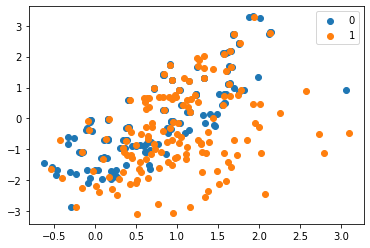

In [9]:
undersampling_v3 = NearMiss(version = 3)
# Трансформируем датасет
X3, y3 = undersampling_v3.fit_resample(X, y)
counter = Counter(y3)
print(counter)
# Визуализация
for label, _ in counter.items():
    row_ix = np.where(y3 == label)[0]
    pyplot.scatter(X3[row_ix, 0], X3[row_ix, 1], label = str(label))
pyplot.legend()
pyplot.show()

### RandomUnderSampling

Counter({0: 147, 1: 147})


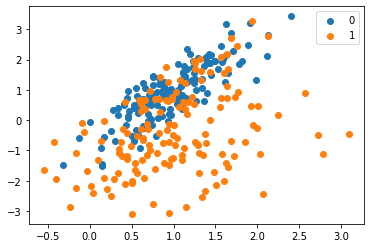

In [10]:
rand_undersampling = RandomUnderSampler(sampling_strategy = 'majority')
# Трансформируем датасет
X_under, y_under = rand_undersampling.fit_resample(X, y)
counter = Counter(y_under)
print(counter)
# Визуализация
for label, _ in counter.items():
    row_ix = np.where(y_under == label)[0]
    pyplot.scatter(X_under[row_ix, 0], X_under[row_ix, 1], label = str(label))
pyplot.legend()
pyplot.show()

### RandomOverSampling

Counter({0: 9853, 1: 9853})


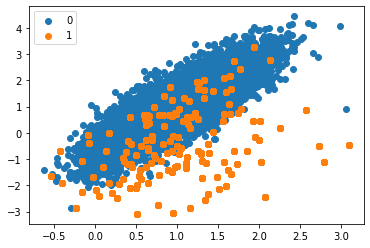

In [11]:
# Увеличение кол-ва членов миноритарного класса
rand_oversampling = RandomOverSampler(sampling_strategy = 'minority')
# Трансформируем датасет
X_over, y_over = rand_oversampling.fit_resample(X, y)
counter = Counter(y_over)
print(counter)
# Визуализация
for label, _ in counter.items():
    row_ix = np.where(y_over == label)[0]
    pyplot.scatter(X_over[row_ix, 0], X_over[row_ix, 1], label = str(label))
pyplot.legend()
pyplot.show()

### SMOTE

Counter({0: 9853, 1: 9853})


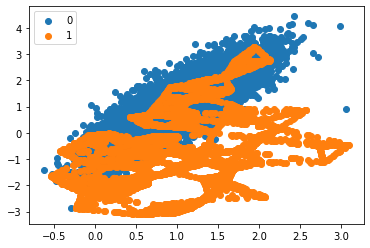

In [12]:
smote = SMOTE()
# Трансформируем датасет
X_smote, y_smote = smote.fit_resample(X, y)
counter = Counter(y_over)
print(counter)
# Визуализация
for label, _ in counter.items():
    row_ix = np.where(y_over == label)[0]
    pyplot.scatter(X_smote[row_ix, 0], X_smote[row_ix, 1], label = str(label))
pyplot.legend()
pyplot.show()

In [13]:
# Пример с банковскими транзакциями
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
data = pd.read_csv("D:\\SourceCode\\jupyter-notebook\\bmstu\\creditcard.csv")

In [14]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
data['Class'].value_counts() # Видно что данные разбалансированны

0    284315
1       492
Name: Class, dtype: int64

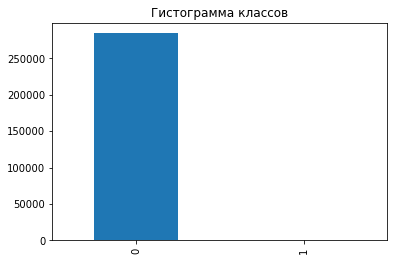

In [16]:
pd.value_counts(data['Class']).plot.bar()
pyplot.title("Гистограмма классов")
pyplot.show()

In [17]:
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 0)

In [18]:
X_train[2]

array([ 1.25498000e+05, -8.66939700e-02,  1.66240223e-01,  1.57312700e+00,
        6.87265786e-01,  2.22358884e-01,  1.10260588e+00,  1.57509329e+00,
       -1.09860846e+00,  7.63886543e-01,  1.40467704e+00,  1.34669715e+00,
        1.40821610e-01,  1.59637064e-01, -1.14715328e+00,  6.64996719e-01,
       -1.33032092e-01, -1.26767455e+00,  8.18995244e-01,  4.05275519e-01,
        5.29600982e-02,  1.53243786e-02,  1.06366315e+00, -4.10840824e-01,
        7.22723475e-01, -1.71733312e-01, -6.13542599e-01, -1.20157065e+00,
       -1.13993068e+00,  1.70100000e+02])

In [19]:
# Балансировка
print(f"Кол-во класса 1 до трансформации {sum(y_train == 1)}")
print(f"Кол-во класса 2 до трансформации {sum(y_train == 0)}")
sm = SMOTE()
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)
print(f"Кол-во класса 1 после трансформации {sum(y_train_resample == 1)}")
print(f"Кол-во класса 2 после трансформации {sum(y_train_resample == 0)}")

Кол-во класса 1 до трансформации [345]
Кол-во класса 2 до трансформации [199019]
Кол-во класса 1 после трансформации 199019
Кол-во класса 2 после трансформации 199019
